<a href="https://colab.research.google.com/github/PhaTanVu/AI_CUOIKI_NHANDANG10LOAIHOA/blob/main/10FLOWER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array
import numpy as np
from sklearn.model_selection import train_test_split
from keras.datasets import cifar100
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization
from keras.models import Sequential, Model
from keras import Input
from keras.layers import LeakyReLU
from keras.optimizers import Adam

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from numpy import asarray

folder = '/content/drive/MyDrive/Colab Notebooks/FLOWER/FLOWER_DATA/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('Hong'):
    output = 0
  if file.startswith('MaoDiaHoang'):
    output = 1
  if file.startswith('Sen'):
    output = 2
  if file.startswith('Su'):
    output = 3
  if file.startswith('VanTho'):
    output = 4
  if file.startswith('HongMon'):
    output = 5
  if file.startswith('ThienDieu'):
    output = 6
  if file.startswith('DongTien'):
    output = 7
  if file.startswith('HuongDuong'):
    output = 8
  if file.startswith('DaUyenThao'):
    output = 9
  photo = load_img(folder + file, target_size=(128, 128))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/Colab Notebooks/FLOWER/FLOWER_DATA/HOA_PHOTOS', photos)
save('/content/drive/MyDrive/Colab Notebooks/FLOWER/FLOWER_DATA/HOA_LABELS', labels)

(1170, 128, 128, 3) (1170,)


In [ ]:
# Load images and labels
from keras.utils import to_categorical #one hot encoding
photos = np.load('/content/drive/MyDrive/Colab Notebooks/FLOWER/FLOWER_DATA/HOA_PHOTOS.npy')
labels = np.load('/content/drive/MyDrive/Colab Notebooks/FLOWER/FLOWER_DATA/HOA_LABELS.npy')
labels_one_hot = to_categorical(labels)
x_train, x_test, y_train, y_test = train_test_split(photos, labels_one_hot, test_size = 0.2, random_state = 128)

In [ ]:
model = Sequential()
#Convolutional
model.add(Conv2D(8, kernel_size= (3,3), activation= 'relu', input_shape = (128,128,3), padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(16, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(32, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(32, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

# Fully connected layers
model.add(Flatten())
model.add(Dense(512, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation= 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer = Adam(), metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 128, 128, 8)       224       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 8)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 16)        1168      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)       

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.2,
    rescale=1./255,
	width_shift_range=0.2,
    height_shift_range=0.2,
	horizontal_flip=True,
    brightness_range=[0.2,1.5], fill_mode="nearest")

In [ ]:
x_train.shape

(936, 128, 128, 3)

In [ ]:
y_train.shape

(936, 10)

In [ ]:
train = model.fit_generator(aug.flow(x_train, y_train, batch_size=64),
                               epochs=200,
                               validation_data=aug.flow(x_test,y_test,
                               batch_size=len(x_test)))

<ipython-input-24-0351de05a4f3>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  train = model.fit_generator(aug.flow(x_train, y_train, batch_size=64),


Epoch 1/200
15/15 [==============================] - 24s 2s/step - loss: 2.2687 - accuracy: 0.1410 - val_loss: 2.2577 - val_accuracy: 0.1838
Epoch 2/200
15/15 [==============================] - 21s 1s/step - loss: 2.1877 - accuracy: 0.1752 - val_loss: 2.0750 - val_accuracy: 0.1923
Epoch 3/200
15/15 [==============================] - 23s 2s/step - loss: 2.0314 - accuracy: 0.2329 - val_loss: 1.9576 - val_accuracy: 0.2308
Epoch 4/200
15/15 [==============================] - 20s 1s/step - loss: 1.9219 - accuracy: 0.2489 - val_loss: 1.8185 - val_accuracy: 0.2692
Epoch 5/200
15/15 [==============================] - 23s 2s/step - loss: 1.8431 - accuracy: 0.2853 - val_loss: 1.6695 - val_accuracy: 0.3547
Epoch 6/200
15/15 [==============================] - 20s 1s/step - loss: 1.7496 - accuracy: 0.3259 - val_loss: 1.5618 - val_accuracy: 0.4615
Epoch 7/200
15/15 [==============================] - 21s 1s/step - loss: 1.6263 - accuracy: 0.3697 - val_loss: 1.5125 - val_accuracy: 0.4274
Epoch 8/200
1

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Accuracy:", test_acc)
print('Loss:', test_loss)

8/8 [==============================] - 2s 216ms/step - loss: 37.7859 - accuracy: 0.9231
Accuracy: 0.9230769276618958
Loss: 37.78589630126953


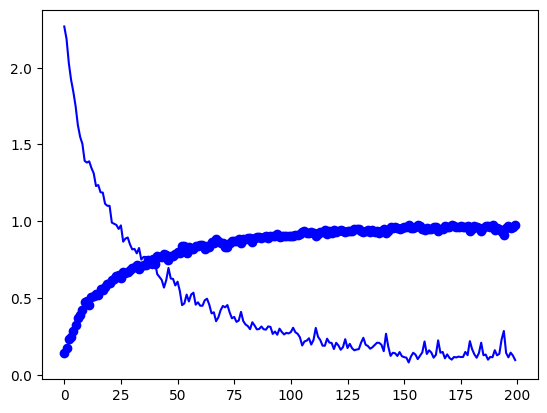

In [ ]:
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label = 'Training accuracy')
plt.plot(epochs, loss, 'b', label = 'Traning loss')
plt.show()

In [ ]:
#Save model
model.save('/content/drive/MyDrive/Colab Notebooks/FLOWER/MODEL_INCEPTION.h5')